In [1]:
from catboost import CatBoostClassifier


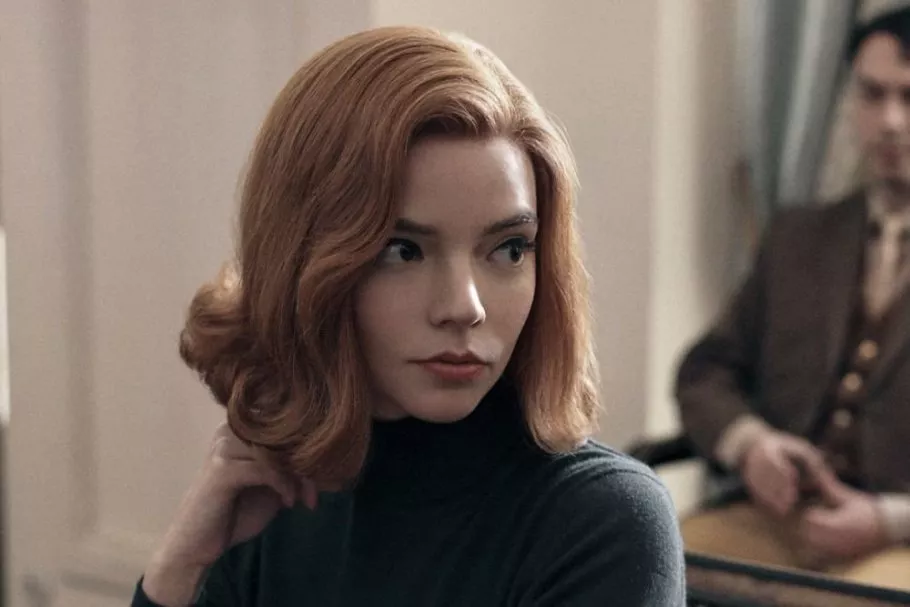

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import optuna
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [45]:
#pip install optuna

In [62]:
df = pd.read_csv('chess_preprocessed_csv')

In [63]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [64]:
df

,utc_date,utc_time,white_score,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,...,Racing Kings_y,imported games_y,fix_time,add_time,prop_x,prop_y,win2loss_x,win2loss_y,ind_greater_mean_x,ind_greater_mean_y
0,1,15,2,0,808,1093,1304,0,0,0,...,0.0,0.0,300,0,0.435863,0.462524,3198,0.938402,0,0
1,1,16,0,0,1318,1531,1748,0,0,0,...,0.0,0.0,300,0,0.490087,0.478276,6157,0.989477,0,0
2,1,17,2,1702,2200,2205,2443,0,0,0,...,0.0,4.0,180,0,0.486030,0.498079,9671,1.094443,1,1
3,1,17,0,0,0,1533,0,0,0,0,...,0.0,0.0,300,3,0.304539,0.823756,28847,5.898765,0,0
4,1,18,2,0,1487,1432,1385,0,0,0,...,0.0,0.0,180,0,0.497059,0.486774,21231,0.964214,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,1,358,2,0,1945,2037,1788,0,0,0,...,0.0,0.0,180,0,0.482156,0.475411,5163,0.998567,1,1
4034,1,358,1,0,0,1630,0,0,0,0,...,0.0,4.0,180,0,0.590909,0.478603,10486,0.997429,1,1
4035,1,368,2,0,1805,2029,2164,0,0,0,...,0.0,0.0,180,2,0.514424,0.491851,11574,1.056512,1,1
4036,1,369,0,0,812,1177,1260,1404,0,0,...,0.0,0.0,300,3,0.467308,0.312102,2608,0.481441,0,0


In [65]:
df = df.drop(df[df['white_score'] == 1].index)
df

,utc_date,utc_time,white_score,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,...,Racing Kings_y,imported games_y,fix_time,add_time,prop_x,prop_y,win2loss_x,win2loss_y,ind_greater_mean_x,ind_greater_mean_y
0,1,15,2,0,808,1093,1304,0,0,0,...,0.0,0.0,300,0,0.435863,0.462524,3198,0.938402,0,0
1,1,16,0,0,1318,1531,1748,0,0,0,...,0.0,0.0,300,0,0.490087,0.478276,6157,0.989477,0,0
2,1,17,2,1702,2200,2205,2443,0,0,0,...,0.0,4.0,180,0,0.486030,0.498079,9671,1.094443,1,1
3,1,17,0,0,0,1533,0,0,0,0,...,0.0,0.0,300,3,0.304539,0.823756,28847,5.898765,0,0
4,1,18,2,0,1487,1432,1385,0,0,0,...,0.0,0.0,180,0,0.497059,0.486774,21231,0.964214,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,1,358,0,0,1490,1568,1714,1217,0,0,...,0.0,0.0,180,0,0.504077,0.488493,2315,1.007429,1,1
4033,1,358,2,0,1945,2037,1788,0,0,0,...,0.0,0.0,180,0,0.482156,0.475411,5163,0.998567,1,1
4035,1,368,2,0,1805,2029,2164,0,0,0,...,0.0,0.0,180,2,0.514424,0.491851,11574,1.056512,1,1
4036,1,369,0,0,812,1177,1260,1404,0,0,...,0.0,0.0,300,3,0.467308,0.312102,2608,0.481441,0,0


In [76]:
df.white_score[df.white_score == 2] = 1

C:\Users\Artem\AppData\Local\Temp\ipykernel_19060\143916737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.white_score[df.white_score == 2] = 1


In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'white_score'), df.white_score, test_size=0.2, random_state=19)

In [78]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [87]:
from sklearn.metrics import fbeta_score, roc_curve, auc, roc_auc_score

[I 2023-06-14 23:43:52,417] A new study created in memory with name: no-name-47062c50-94b6-4ad7-a810-56c5c55d08d5
C:\Users\Artem\AppData\Local\Temp\ipykernel_19060\104764323.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
C:\Users\Artem\AppData\Local\Temp\ipykernel_19060\104764323.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
C:\Users\Artem\AppData\Local\Temp\ipykernel_19060\104764323.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optun

[I 2023-06-14 23:44:48,535] Trial 5 finished with value: 0.48421801165297984 and parameters: {'iterations': 575, 'learning_rate': 0.2713363480117452, 'depth': 5, 'l2_leaf_reg': 2.6861922159970595, 'random_strength': 11, 'bagging_temperature': 0.09865689119938084}. Best is trial 0 with value: 0.4882364147259132.
C:\Users\Artem\AppData\Local\Temp\ipykernel_19060\104764323.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
C:\Users\Artem\AppData\Local\Temp\ipykernel_19060\104764323.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
C

0:	learn: 0.6917831	total: 63.4ms	remaining: 43.6s
1:	learn: 0.6904197	total: 119ms	remaining: 40.8s
2:	learn: 0.6887227	total: 165ms	remaining: 37.7s
3:	learn: 0.6874812	total: 208ms	remaining: 35.7s
4:	learn: 0.6852243	total: 245ms	remaining: 33.6s
5:	learn: 0.6839746	total: 283ms	remaining: 32.2s
6:	learn: 0.6826962	total: 327ms	remaining: 31.9s
7:	learn: 0.6816960	total: 363ms	remaining: 30.9s
8:	learn: 0.6805118	total: 398ms	remaining: 30.1s
9:	learn: 0.6787765	total: 433ms	remaining: 29.4s
10:	learn: 0.6761122	total: 468ms	remaining: 28.9s
11:	learn: 0.6741041	total: 504ms	remaining: 28.5s
12:	learn: 0.6732536	total: 539ms	remaining: 28s
13:	learn: 0.6704828	total: 573ms	remaining: 27.6s
14:	learn: 0.6693950	total: 607ms	remaining: 27.3s
15:	learn: 0.6675016	total: 641ms	remaining: 27s
16:	learn: 0.6669283	total: 676ms	remaining: 26.7s
17:	learn: 0.6661046	total: 712ms	remaining: 26.6s
18:	learn: 0.6633995	total: 747ms	remaining: 26.4s
19:	learn: 0.6624638	total: 783ms	remaining:

162:	learn: 0.5263916	total: 5.71s	remaining: 18.4s
163:	learn: 0.5255870	total: 5.75s	remaining: 18.4s
164:	learn: 0.5221298	total: 5.79s	remaining: 18.4s
165:	learn: 0.5212477	total: 5.82s	remaining: 18.3s
166:	learn: 0.5204579	total: 5.86s	remaining: 18.3s
167:	learn: 0.5190988	total: 5.89s	remaining: 18.3s
168:	learn: 0.5170727	total: 5.92s	remaining: 18.2s
169:	learn: 0.5166177	total: 5.96s	remaining: 18.2s
170:	learn: 0.5156907	total: 5.99s	remaining: 18.2s
171:	learn: 0.5151953	total: 6.03s	remaining: 18.1s
172:	learn: 0.5147283	total: 6.07s	remaining: 18.1s
173:	learn: 0.5144124	total: 6.1s	remaining: 18.1s
174:	learn: 0.5132789	total: 6.14s	remaining: 18s
175:	learn: 0.5126517	total: 6.17s	remaining: 18s
176:	learn: 0.5112342	total: 6.2s	remaining: 17.9s
177:	learn: 0.5101085	total: 6.24s	remaining: 17.9s
178:	learn: 0.5089492	total: 6.27s	remaining: 17.9s
179:	learn: 0.5081189	total: 6.3s	remaining: 17.8s
180:	learn: 0.5077185	total: 6.34s	remaining: 17.8s
181:	learn: 0.50647

325:	learn: 0.2430822	total: 11.6s	remaining: 12.9s
326:	learn: 0.2415526	total: 11.6s	remaining: 12.8s
327:	learn: 0.2410190	total: 11.6s	remaining: 12.8s
328:	learn: 0.2395901	total: 11.7s	remaining: 12.8s
329:	learn: 0.2381164	total: 11.7s	remaining: 12.7s
330:	learn: 0.2366929	total: 11.8s	remaining: 12.7s
331:	learn: 0.2356163	total: 11.8s	remaining: 12.7s
332:	learn: 0.2346789	total: 11.8s	remaining: 12.6s
333:	learn: 0.2332522	total: 11.9s	remaining: 12.6s
334:	learn: 0.2311568	total: 11.9s	remaining: 12.6s
335:	learn: 0.2300904	total: 11.9s	remaining: 12.5s
336:	learn: 0.2280310	total: 12s	remaining: 12.5s
337:	learn: 0.2269535	total: 12s	remaining: 12.5s
338:	learn: 0.2258023	total: 12s	remaining: 12.4s
339:	learn: 0.2248788	total: 12.1s	remaining: 12.4s
340:	learn: 0.2231823	total: 12.1s	remaining: 12.4s
341:	learn: 0.2212758	total: 12.1s	remaining: 12.3s
342:	learn: 0.2203802	total: 12.2s	remaining: 12.3s
343:	learn: 0.2187465	total: 12.2s	remaining: 12.3s
344:	learn: 0.2178

487:	learn: 0.1156012	total: 17.6s	remaining: 7.26s
488:	learn: 0.1154738	total: 17.7s	remaining: 7.22s
489:	learn: 0.1149184	total: 17.7s	remaining: 7.19s
490:	learn: 0.1144694	total: 17.7s	remaining: 7.15s
491:	learn: 0.1139083	total: 17.8s	remaining: 7.12s
492:	learn: 0.1133844	total: 17.8s	remaining: 7.08s
493:	learn: 0.1130992	total: 17.8s	remaining: 7.04s
494:	learn: 0.1128362	total: 17.9s	remaining: 7.01s
495:	learn: 0.1125171	total: 17.9s	remaining: 6.97s
496:	learn: 0.1122295	total: 18s	remaining: 6.94s
497:	learn: 0.1119725	total: 18s	remaining: 6.9s
498:	learn: 0.1116394	total: 18s	remaining: 6.86s
499:	learn: 0.1114219	total: 18.1s	remaining: 6.83s
500:	learn: 0.1109005	total: 18.1s	remaining: 6.79s
501:	learn: 0.1102448	total: 18.1s	remaining: 6.75s
502:	learn: 0.1100298	total: 18.2s	remaining: 6.72s
503:	learn: 0.1096985	total: 18.2s	remaining: 6.68s
504:	learn: 0.1091869	total: 18.2s	remaining: 6.65s
505:	learn: 0.1088240	total: 18.3s	remaining: 6.61s
506:	learn: 0.10845

647:	learn: 0.0675378	total: 23.7s	remaining: 1.5s
648:	learn: 0.0671771	total: 23.7s	remaining: 1.46s
649:	learn: 0.0670206	total: 23.8s	remaining: 1.43s
650:	learn: 0.0668280	total: 23.8s	remaining: 1.39s
651:	learn: 0.0666746	total: 23.9s	remaining: 1.35s
652:	learn: 0.0664162	total: 23.9s	remaining: 1.32s
653:	learn: 0.0661793	total: 24s	remaining: 1.28s
654:	learn: 0.0660107	total: 24s	remaining: 1.25s
655:	learn: 0.0657801	total: 24s	remaining: 1.21s
656:	learn: 0.0655630	total: 24.1s	remaining: 1.17s
657:	learn: 0.0654324	total: 24.1s	remaining: 1.14s
658:	learn: 0.0653027	total: 24.1s	remaining: 1.1s
659:	learn: 0.0651211	total: 24.2s	remaining: 1.06s
660:	learn: 0.0648635	total: 24.2s	remaining: 1.02s
661:	learn: 0.0647259	total: 24.3s	remaining: 989ms
662:	learn: 0.0645456	total: 24.3s	remaining: 953ms
663:	learn: 0.0643369	total: 24.3s	remaining: 916ms
664:	learn: 0.0641940	total: 24.4s	remaining: 879ms
665:	learn: 0.0638687	total: 24.4s	remaining: 843ms
666:	learn: 0.063632

C:\Users\Artem\anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


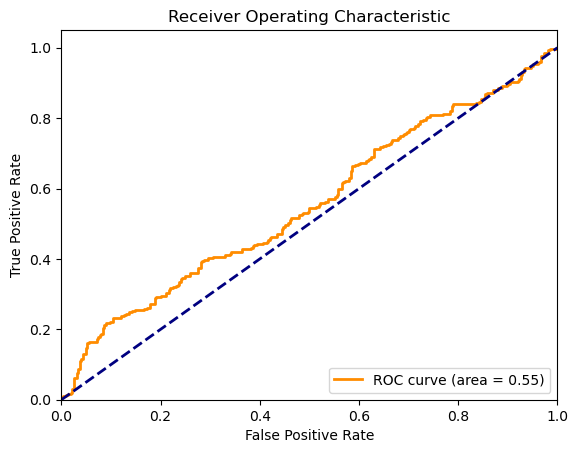

In [80]:
import optuna
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import fbeta_score, roc_curve, auc, roc_auc
import matplotlib.pyplot as plt


# Определение функции потерь
def objective(trial):
    # Определение пространства поиска гиперпараметров
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
        'random_strength': trial.suggest_int('random_strength', 1, 20),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0)
    }
    
    # Обучение модели с текущими гиперпараметрами
    model = CatBoostClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    # Предсказание на валидационном наборе данных
    y_pred = model.predict(X_val)
    
    # Вычисление F-бета меры с бета = 0.1
    score = fbeta_score(y_val, y_pred, beta=0.1)
    
    return score

# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Получение лучших гиперпараметров
best_params = study.best_params

# Обучение модели с лучшими гиперпараметрами
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = best_model.predict(X_val)

# Вычисление F-бета меры с бета = 0.1
fbeta = fbeta_score(y_val, y_pred, beta=0.1)

# Визуализация ROC-AUC
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [82]:
fbeta

0.48658928269566687

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pipe_forest =  Pipeline([
                         ('Scaler', StandardScaler()),
                         # ('PCA', PCA(n_components=150)),
                         ('Forest', RandomForestClassifier(n_estimators=494,
                                                           max_depth=22,
                                                           min_samples_split=7,
                                                           min_samples_leaf=3,
                                                           max_features="log2",
                                                           random_state=42))
                        ])

pipe_forest.fit(X_train, y_train)
y_proba = pipe_forest.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_proba)

0.5486577406082049

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

scale_pca_pipe_forest = Pipeline([
                                ('Scaler', StandardScaler()),
                                # ('PCA', PCA(n_components=145, random_state=42)),
                                ('KBest', SelectKBest(f_classif, k='all')),
                                ('sgd', SGDClassifier(loss='modified_huber',
                                                      penalty="l1",
                                                      alpha=0.009,
                                                      learning_rate="invscaling",
                                                      max_iter=1000,
                                                      tol=1e-3,
                                                      eta0=0.0008,
                                                      random_state=42))
                                ])

scale_pca_pipe_forest.fit(X_train, y_train)
y_proba = scale_pca_pipe_forest.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_proba)

C:\Users\Artem\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Artem\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


0.544710707249407

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipe_logreg = Pipeline([
                      ('Scaler', StandardScaler()),
                      # ('PCA', PCA(n_components=187)),
                      ('KBest', SelectKBest(f_classif, k='all')),
                      ('svc', LogisticRegression())
                     ])

pipe_logreg.fit(X_train, y_train)
y_proba = pipe_logreg.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_proba)

C:\Users\Artem\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Artem\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


0.5667511023548175

__Вывод: мы рассмотрели кэтбуст с оптуной на довольно малом кол-ве итераций, СВМ, случайный лес, а также логистическую регрессию. В силу того, что возникла проблема с баном на сайте личесс, выборка недостаточно репрезентативна и модели не могут в полной мере показать свою обобщающую способность. Тем не мене, несмотря на то, что задача практически на уровне "сыграть в казино и выиграть", логрег показывает лучший результат и рок-аук в районе 0.6, что говорит о потенциале предикативной способности моделей в рамках задачи, остается достать больше объектов.__